In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

### Plot Linear Miscalibration Results

In [2]:
METHODS=['raw_deterministic', 'er_deterministic', 'swiss', 'merit']
STATS = ['prec', 'prec_quality']
NAMES = {
    'er_deterministic': 'Deterministic (model score)',
    'raw_deterministic': 'Deterministic (mean score)',
    'merit': 'MERIT',
    'swiss': 'Swiss NSF'
}

In [24]:
def plot_linear_miscal(param, df, accept_rate=3):
    df_plot = df[df.k == df.n_items // accept_rate]

    # Melt the DataFrame for seaborn
    df_melt = df_plot.melt(
        id_vars=[param],
        value_vars=[f'prec_{m}' for m in METHODS],
        var_name='Method',
        value_name='Expected Utility'
    )
    df_melt['Method'] = df_melt['Method'].map(lambda x: NAMES[x.replace('prec_', '')])

    plt.figure(figsize=(8, 3.5))  # Half the height, same width
    ax = sns.pointplot(
        data=df_melt,
        x=param,
        y='Expected Utility',
        hue='Method',
        errorbar=('ci', 95),
        n_boot=1000,
        capsize=0.1,
        markers=['o', 's', 'D', '^'],
        linestyles=['-', '--', '-.', ':'],
        join=True
    )
    ax.set_ylabel('Expected Utility', fontsize=14)

    if param == 'sigma_b':
       xlab = '$\sigma_b$ (Linear Miscalibration)'
    if param == 'sigma_a':
        xlab = '$\sigma_a$ (Multiplicative Miscalibration)'

    ax.set_xlabel(xlab, fontsize=14)
    # Custom legend with both line and marker
    unique_methods = df_melt['Method'].unique()
    colors = sns.color_palette(n_colors=len(unique_methods))
    markers = ['o', 's', 'D', 'v']
    linestyles = ['-', '--', '-.', ':']

    legend_elements = [
        Line2D(
            [0], [0],
            marker=markers[i],
            linestyle=linestyles[i],
            color=colors[i],
            label=method,
            markersize=6,
            linewidth=2
        )
        for i, method in enumerate(unique_methods)
    ]

    ax.legend(handles=legend_elements, loc='best', frameon=True, fontsize=14)
    ax.tick_params(axis='both', labelsize=14)

    # also return data frame with raw data
    df_raw = df_plot[[param] + [f'prec_{m}' for m in METHODS]]

    return ax, df_raw

In [25]:
df = pd.read_csv('res/simulation_results/linear_miscalibration_results_swissnsfparams.csv')

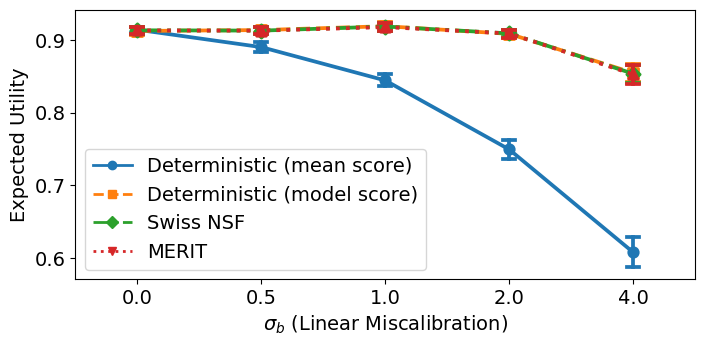

In [26]:
ax, df_out = plot_linear_miscal('sigma_b', df, 3)

In [6]:
df_out[df_out.sigma_b == 1.0].mean()

sigma_b                   1.000000
prec_raw_deterministic    0.844483
prec_er_deterministic     0.919138
prec_swiss                0.918703
prec_merit                0.917897
dtype: float64

In [7]:
# Compute standard error of the mean for each column in df (excluding 'sigma_b')
sem = df_out.drop(columns=['sigma_b']).sem()
print(1.96*sem)

prec_raw_deterministic    0.014955
prec_er_deterministic     0.004479
prec_swiss                0.004427
prec_merit                0.004438
dtype: float64


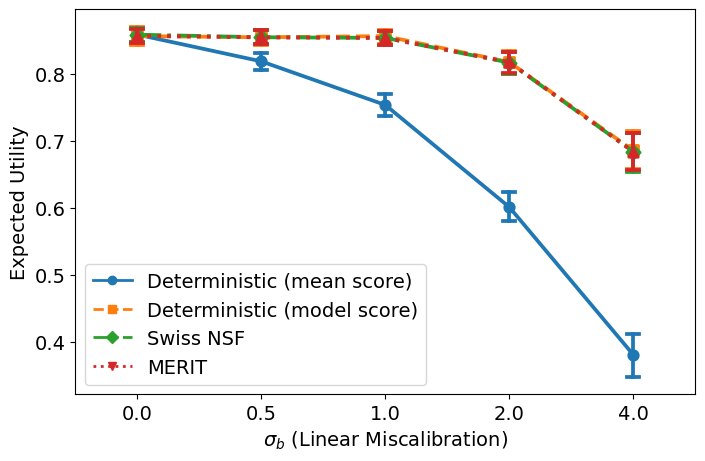

In [9]:
ax, df_out = plot_linear_miscal('sigma_b', df, 10)

In [10]:
# Plot n_rand_swiss and n_rand_merit as a function of sigma_b
def plot_n_rand(param, df, accept_rate=3):
    df_plot = df[df.k == df.n_items // accept_rate]

    plt.figure(figsize=(8, 5))
    ax = sns.lineplot(
        data=df_plot,
        x=param,
        y='n_rand_swiss',
        label='SWISS',
        marker='o'
    )
    sns.lineplot(
        data=df_plot,
        x=param,
        y='n_rand_merit',
        label='MERIT',
        marker='s'
    )

    ax.set_ylabel('Number of Random Items', fontsize=14)
    ax.set_xlabel('$\sigma_b$ (Linear Miscalibration)', fontsize=14)
    ax.tick_params(axis='both', labelsize=14)
    ax.legend(fontsize=14)

    return ax

<Axes: xlabel='$\\sigma_b$ (Linear Miscalibration)', ylabel='Number of Random Items'>

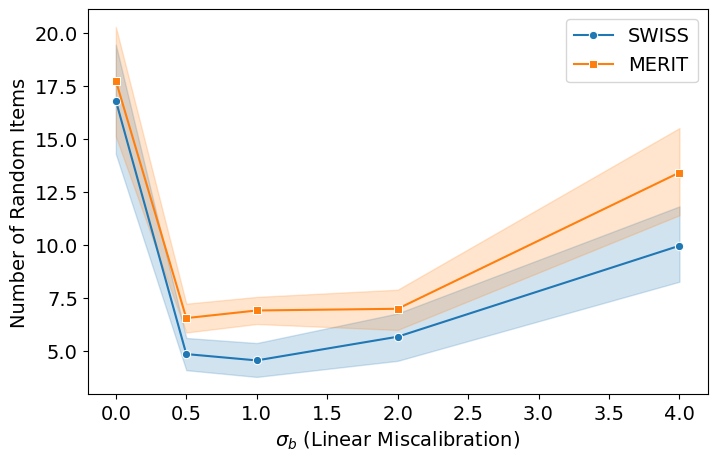

In [11]:
plot_n_rand('sigma_b', df, 3)

### Conference Parameters

In [27]:
df = pd.read_csv('res/simulation_results/linear_miscalibration_results_conferenceparams.csv')

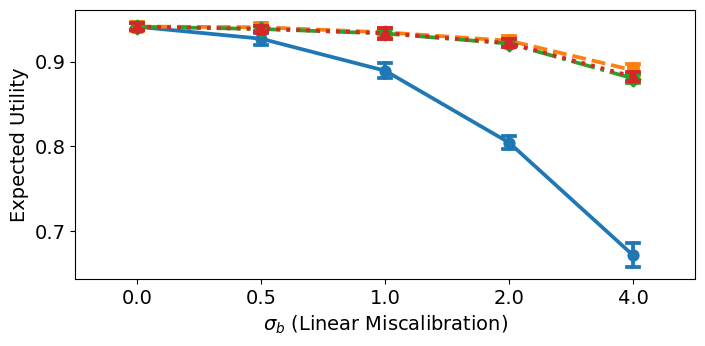

In [29]:
ax, df_out = plot_linear_miscal('sigma_b', df, 3)
# hide the legend
ax.legend().set_visible(False)

In [14]:
df_out[df_out.sigma_b == 1.0].mean()

sigma_b                   1.000000
prec_raw_deterministic    0.889189
prec_er_deterministic     0.934535
prec_swiss                0.933178
prec_merit                0.933759
dtype: float64

In [15]:
df_out[df_out.sigma_b == 1.0].sem()*1.96

sigma_b                   0.000000
prec_raw_deterministic    0.008967
prec_er_deterministic     0.005250
prec_swiss                0.006228
prec_merit                0.006612
dtype: float64

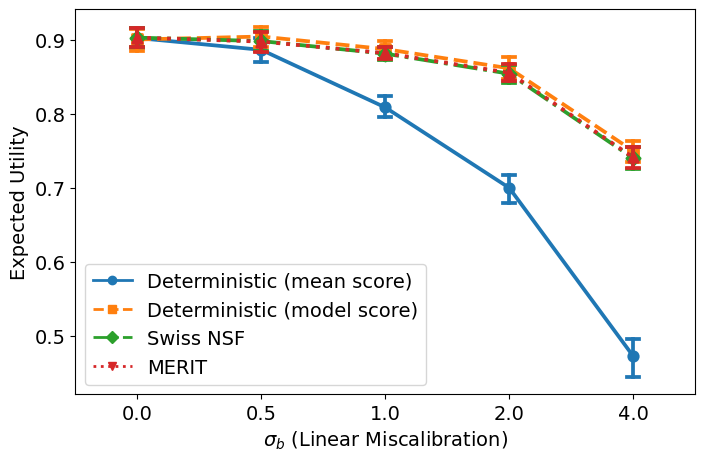

In [17]:
ax, df_out = plot_linear_miscal('sigma_b', df, 10)

### Under Misspecification

In [18]:
df = pd.read_csv('res/simulation_results/linear_miscalibration_results_swissnsfparams_misspecified_sigmaa.csv')

(<Axes: xlabel='$\\sigma_a$ (Multiplicative Miscalibration)', ylabel='Expected Utility'>,
      sigma_a  prec_raw_deterministic  prec_er_deterministic  prec_swiss  \
 1        0.0                0.750000               0.905172    0.906404   
 3        0.0                0.801724               0.931034    0.933908   
 5        0.0                0.818966               0.922414    0.922414   
 7        0.0                0.732759               0.879310    0.873563   
 9        0.0                0.758621               0.905172    0.910920   
 ..       ...                     ...                    ...         ...   
 491      4.0                0.379310               0.655172    0.653941   
 493      4.0                0.353448               0.534483    0.531609   
 495      4.0                0.500000               0.672414    0.672641   
 497      4.0                0.465517               0.706897    0.715517   
 499      4.0                0.353448               0.517241    0.524687  

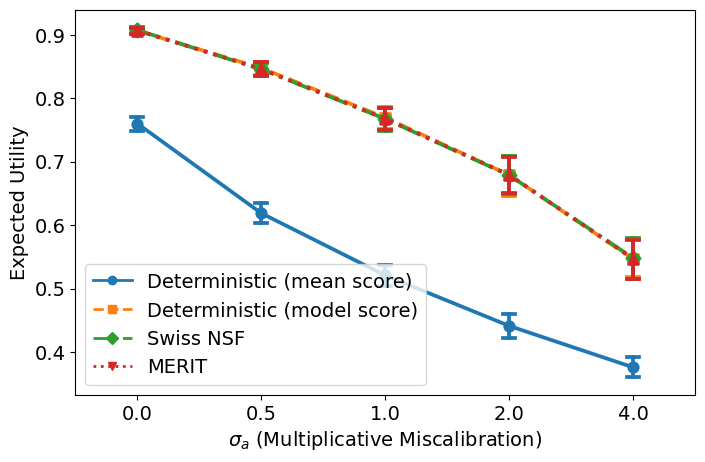

In [19]:
plot_linear_miscal('sigma_a', df, 3)

(<Axes: xlabel='$\\sigma_a$ (Multiplicative Miscalibration)', ylabel='Expected Utility'>,
      sigma_a  prec_raw_deterministic  prec_er_deterministic  prec_swiss  \
 0        0.0                0.485714               0.742857    0.745455   
 2        0.0                0.628571               0.714286    0.714286   
 4        0.0                0.657143               0.828571    0.834286   
 6        0.0                0.571429               0.857143    0.857143   
 8        0.0                0.628571               0.828571    0.840000   
 ..       ...                     ...                    ...         ...   
 490      4.0                0.200000               0.428571    0.438095   
 492      4.0                0.171429               0.200000    0.217143   
 494      4.0                0.142857               0.485714    0.502521   
 496      4.0                0.228571               0.400000    0.377143   
 498      4.0                0.114286               0.142857    0.171429  

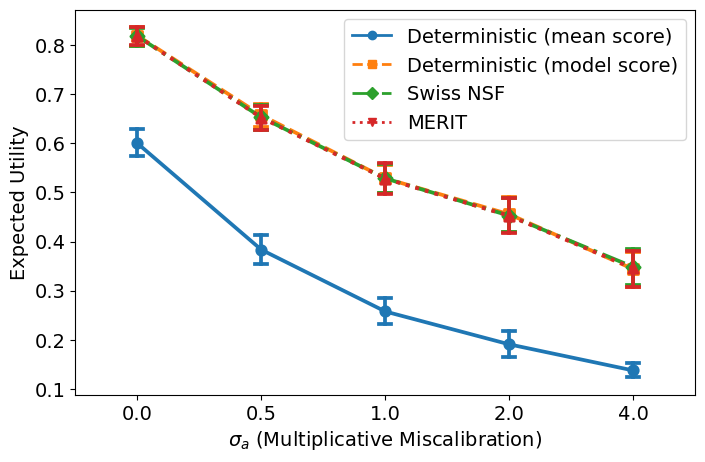

In [20]:
plot_linear_miscal('sigma_a', df, 10)

In [15]:
df = pd.read_csv('res/simulation_results/linear_miscalibration_results_conferenceparams_misspecified_sigmaa.csv')

(<Axes: xlabel='$\\sigma_a$ (Multiplicative Miscalibration)', ylabel='Expected Utility'>,
     sigma_a  prec_raw_deterministic  prec_er_deterministic  prec_swiss  \
 1       0.0                0.813814               0.942943    0.933122   
 3       0.0                0.807808               0.912913    0.912766   
 5       0.0                0.780781               0.915916    0.919597   
 7       0.0                0.795796               0.921922    0.914972   
 9       0.0                0.801802               0.930931    0.925715   
 11      0.0                0.822823               0.921922    0.927197   
 13      0.0                0.816817               0.912913    0.920063   
 15      0.0                0.807808               0.930931    0.929429   
 17      0.0                0.804805               0.933934    0.927575   
 19      0.0                0.807808               0.939940    0.934704   
 21      0.5                0.684685               0.885886    0.866099   
 23      0

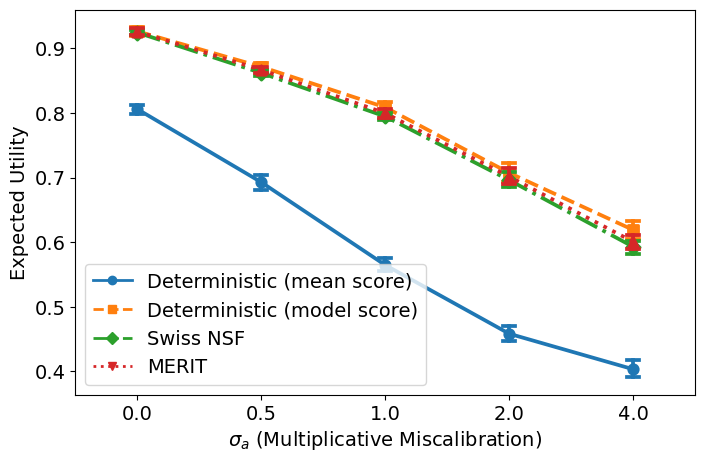

In [16]:
plot_linear_miscal('sigma_a', df, 3)

## Risky Bias Results

In [15]:
def plot_riskybias(param, df):
    # Pivot to long format
    df_long = df.melt(
        id_vars=param,
        value_vars=['q_merit', 'q_swiss', 'q_deterministic_mean', 'q_deterministic_median'],
        var_name='Method',
        value_name='Quality'
    )
    method_map = {
        'q_merit': 'MERIT',
        'q_swiss': 'Swiss NSF',
        'q_deterministic_mean': 'Deterministic (mean)',
        'q_deterministic_median': 'Deterministic (median)'
    }
    df_long['Method'] = df_long['Method'].map(method_map)

    df_long[param] = df_long[param].round(2)

    plt.figure(figsize=(8, 5))
    unique_methods = df_long['Method'].unique()
    colors = sns.color_palette(n_colors=len(unique_methods))
    markers = ['o', 's', 'D', 'v']
    linestyles = ['-', '--', '-.', ':']

    # Use seaborn's pointplot for all methods at once, specifying markers via hue
    ax = sns.pointplot(
        data=df_long,
        x=param,
        y='Quality',
        hue='Method',
        errorbar=('ci', 95),
        n_boot=5000,
        capsize=0.1,
        markers=markers[:len(unique_methods)],
        linestyles=linestyles[:len(unique_methods)],
        dodge=False
    )

    if param == 'p_bias':
        ax.set_xlabel('Probability of bias', fontsize=14)
    if param == 'sigma_err':
        ax.set_xlabel(r'$\sigma$ (Gaussian noise SD)', fontsize=14)
    if param == 'alpha':
        ax.set_xlabel(r'$\alpha$ (Power law parameter)', fontsize=14)
    ax.set_ylabel('Total quality', fontsize=14)
    ax.legend(fontsize=14)
    ax.tick_params(axis='both', labelsize=14)

    legend_elements = [
        Line2D(
            [0], [0],
            marker=markers[i],
            linestyle=linestyles[i],
            color=colors[i],
            label=method,
            markersize=6,
            linewidth=2
        )
        for i, method in enumerate(unique_methods)
    ]

    ax.legend(handles=legend_elements, loc='best', frameon=True, fontsize=14)
    ax.tick_params(axis='both', labelsize=14)

    plt.tight_layout()


    return ax


In [16]:
df = pd.read_csv('res/simulation_results/riskybias_swissnsf_pbias.csv')

<Axes: xlabel='Probability of bias', ylabel='Total quality'>

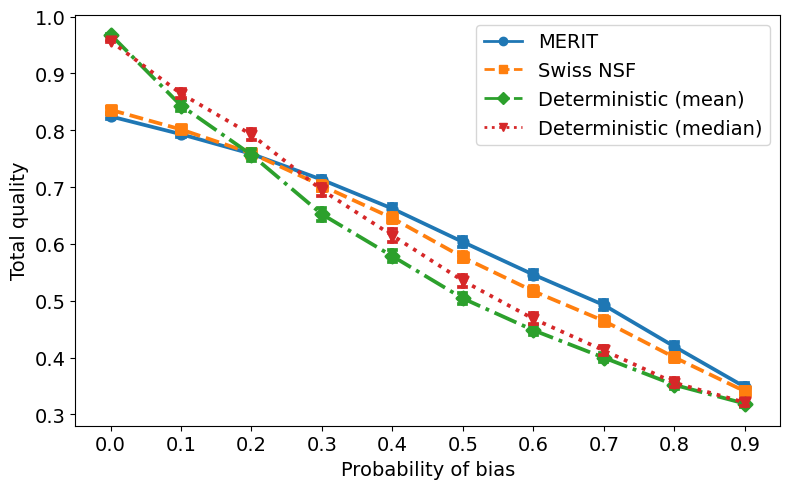

In [17]:
plot_riskybias('p_bias', df)

In [18]:
df = pd.read_csv('res/simulation_results/riskybias_swissnsf_sigma_err.csv')

<Axes: xlabel='$\\sigma$ (Gaussian noise SD)', ylabel='Total quality'>

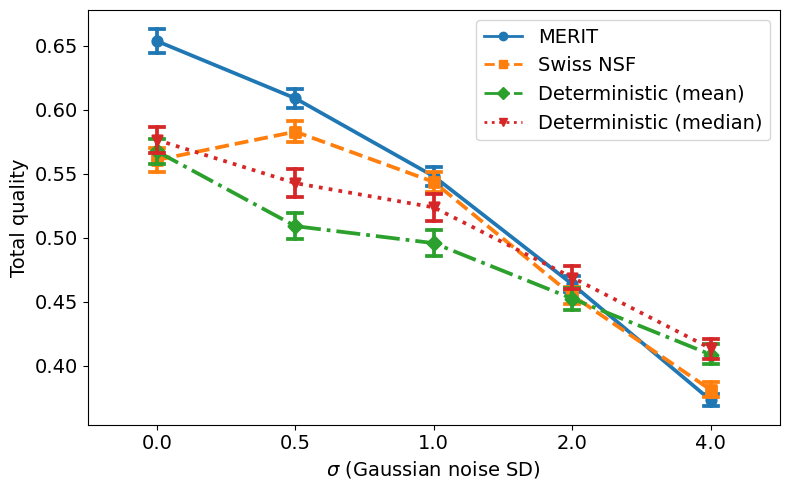

In [19]:
plot_riskybias('sigma_err', df)

In [20]:
df = pd.read_csv('res/simulation_results/riskybias_swissnsf_alpha.csv')

<Axes: xlabel='$\\alpha$ (Power law parameter)', ylabel='Total quality'>

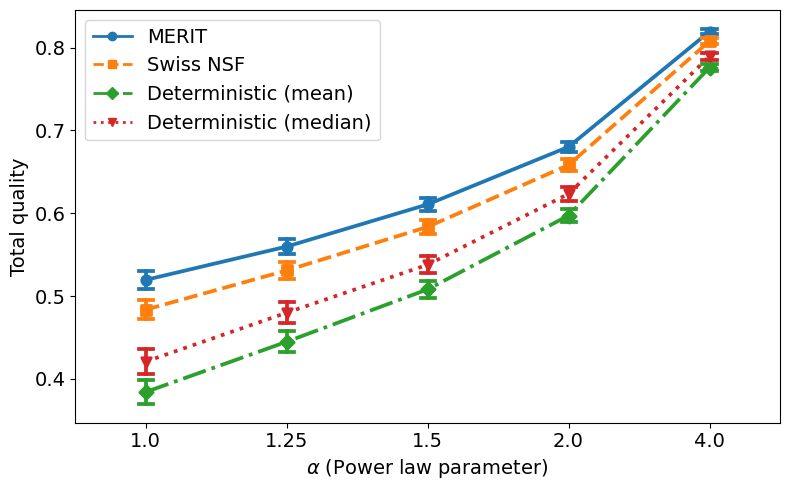

In [21]:
plot_riskybias('alpha', df)

In [22]:
df = pd.read_csv('res/simulation_results/riskybias_conference_pbias.csv')

<Axes: xlabel='Probability of bias', ylabel='Total quality'>

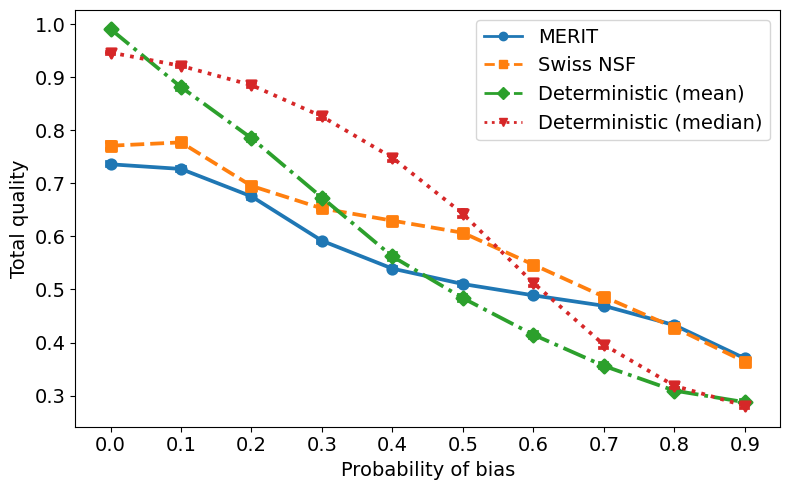

In [23]:
plot_riskybias('p_bias', df)

# Subjective Score Model

In [33]:
# Method mappings for subjective score results
SUBJ_METHODS = ['merit', 'swiss', 'deterministic_mean', 'deterministic_median']
SUBJ_NAMES = {
    'merit': 'Merit-based',
    'swiss': 'Swiss NSF',
    'deterministic_mean': 'Mean Score',
    'deterministic_median': 'Median Score'
}

def plot_subj_score(param, df, param_label=None):
    """
    Plot results from subjective score simulations.
    
    Parameters:
    -----------
    param : str
        Parameter name to plot on x-axis ('prop_expert', 'prop_controversial', 'prob_conflict')
    df : pd.DataFrame
        Results dataframe from run_subjective_score_sims()
    param_label : str, optional
        Custom label for x-axis. If None, will use default labels.
    
    Returns:
    --------
    ax : matplotlib axis
        The plot axis
    df_raw : pd.DataFrame
        Raw data used for plotting (means and std devs)
    """
    
    # Group by parameter value and calculate statistics
    df_grouped = df.groupby('param_value').agg({
        'q_merit': ['mean', 'std'],
        'q_swiss': ['mean', 'std'], 
        'q_deterministic_mean': ['mean', 'std'],
        'q_deterministic_median': ['mean', 'std']
    }).reset_index()
    
    # Flatten column names
    df_grouped.columns = ['param_value'] + [f'{col[0]}_{col[1]}' for col in df_grouped.columns[1:]]
    
    # Melt the DataFrame for seaborn plotting
    # First melt the means
    df_means = df_grouped.melt(
        id_vars=['param_value'],
        value_vars=['q_merit_mean', 'q_swiss_mean', 'q_deterministic_mean_mean', 'q_deterministic_median_mean'],
        var_name='Method',
        value_name='Expected_Utility'
    )
    
    # Clean up method names
    df_means['Method'] = df_means['Method'].str.replace('q_', '').str.replace('_mean', '')
    df_means['Method'] = df_means['Method'].map(SUBJ_NAMES)
    
    # Also get standard deviations for error bars
    df_stds = df_grouped.melt(
        id_vars=['param_value'],
        value_vars=['q_merit_std', 'q_swiss_std', 'q_deterministic_mean_std', 'q_deterministic_median_std'],
        var_name='Method',
        value_name='Std'
    )
    df_stds['Method'] = df_stds['Method'].str.replace('q_', '').str.replace('_std', '')
    df_stds['Method'] = df_stds['Method'].map(SUBJ_NAMES)
    
    # Merge means and stds
    df_plot = df_means.merge(df_stds, on=['param_value', 'Method'])
    
    plt.figure(figsize=(8, 5))
    ax = sns.pointplot(
        data=df_plot,
        x='param_value',
        y='Expected_Utility',
        hue='Method',
        errorbar=None,  # We'll add custom error bars
        markers=['o', 's', 'D', '^'],
        linestyles=['-', '--', '-.', ':'],
        join=True,
        capsize=0.1
    )
    
    # Add custom error bars using standard deviation
    unique_methods = df_plot['Method'].unique()
    colors = sns.color_palette(n_colors=len(unique_methods))
    
    for i, method in enumerate(unique_methods):
        method_data = df_plot[df_plot['Method'] == method]
        ax.errorbar(
            x=range(len(method_data)),
            y=method_data['Expected_Utility'],
            yerr=method_data['Std'],
            fmt='none',
            color=colors[i],
            capsize=3,
            alpha=0.7
        )
    
    ax.set_ylabel('Expected Utility (Fraction of Optimal)', fontsize=14)
    
    # Set appropriate x-axis label
    if param_label is None:
        if param == 'prop_expert':
            param_label = 'Proportion of Expert Reviewers'
        elif param == 'prop_controversial':
            param_label = 'Proportion of Controversial Items'
        elif param == 'prob_conflict':
            param_label = 'Probability of Expert Conflicts'
        else:
            param_label = param.replace('_', ' ').title()
    
    ax.set_xlabel(param_label, fontsize=14)
    
    # Custom legend with both line and marker
    markers = ['o', 's', 'D', '^']
    linestyles = ['-', '--', '-.', ':']
    
    legend_elements = [
        Line2D(
            [0], [0],
            marker=markers[i],
            linestyle=linestyles[i],
            color=colors[i],
            label=method,
            markersize=6,
            linewidth=2
        )
        for i, method in enumerate(unique_methods)
    ]
    
    ax.legend(handles=legend_elements, loc='best', frameon=True, fontsize=12)
    ax.tick_params(axis='both', labelsize=12)
    
    # Set y-axis to start from reasonable lower bound
    ax.set_ylim(bottom=max(0, df_plot['Expected_Utility'].min() - 0.05))
    
    plt.tight_layout()
    
    # Return raw data for further analysis
    df_raw = df_grouped[['param_value', 'q_merit_mean', 'q_swiss_mean', 
                        'q_deterministic_mean_mean', 'q_deterministic_median_mean']]
    df_raw.columns = ['param_value', 'Merit', 'Swiss NSF', 'Mean Score', 'Median Score']
    
    return ax, df_raw

In [37]:
df = pd.read_csv('res/simulation_results/subjective_scores_swissnsf_prob_conflict.csv')

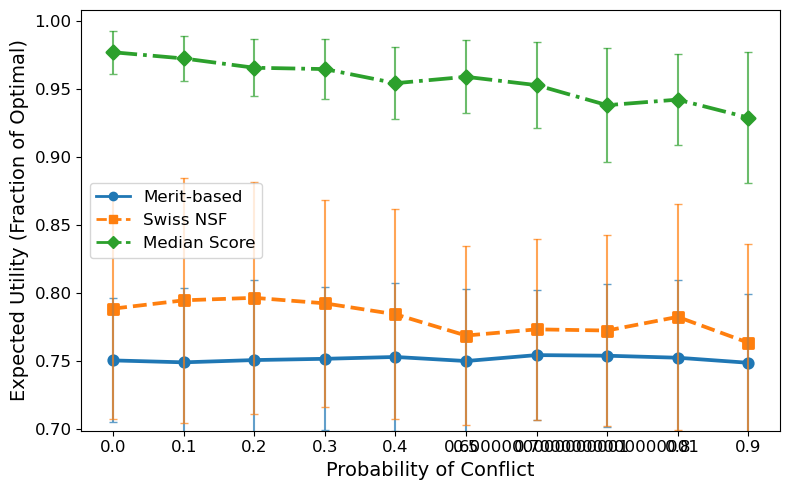

In [38]:
ax, df = plot_subj_score('prob_conflict', df, 'Probability of Conflict')

## Simple Risky Bias Model

In [46]:
from scipy.stats import pareto
from helpers import swiss_nsf, top_k
from merit import solve_problem

In [52]:
n_items = 2
n_reviewers = 100
alpha = 1.1
p_bias = 0.2

q_deterministic_list = []
q_merit_list = []
q_swiss_list = []

for p_bias in np.arange(0, 1.1, 0.1):
    for i in range(10000):
        theta = pareto.rvs(alpha, size=n_items)
        raw_scores = pareto.cdf(theta, alpha)
        biased_scores = raw_scores.copy()
        intervals = []
        for item in range(n_items):
            if raw_scores[item] > 0.9 and p_bias > 0:
                biased_scores[item] = p_bias * 0.5 + (1 - p_bias) * raw_scores[item]
                intervals += [(0.5, raw_scores[item])]
            else: 
                intervals += [(raw_scores[item], raw_scores[item])]
        
        true_top_k = top_k(theta, 1)
        deterministic_scores = top_k(biased_scores, 1)
        merit_scores,_,_ = solve_problem(
            intervals, 1
        )
        swiss_scores = swiss_nsf(intervals, biased_scores, 1)

        # evaluate each method
        opt_quality = np.dot(theta, true_top_k)
        deterministic_quality = np.dot(deterministic_scores, theta) / opt_quality
        merit_quality = np.dot(merit_scores, theta) / opt_quality
        swiss_quality = np.dot(swiss_scores, theta) / opt_quality

        q_deterministic_list.append(deterministic_quality)
        q_merit_list.append(merit_quality)
        q_swiss_list.append(swiss_quality)

    mean_deterministic = np.mean(q_deterministic_list)
    mean_merit = np.mean(q_merit_list)
    mean_swiss = np.mean(q_swiss_list)

    print(f"Results for p_bias = {p_bias}:")
    print("Mean deterministic quality:", mean_deterministic)
    print("Mean MERIT quality:", mean_merit)
    print("Mean SwissNSF quality:", mean_swiss)

Results for p_bias = 0.0:
Mean deterministic quality: 1.0
Mean MERIT quality: 1.0
Mean SwissNSF quality: 1.0
Results for p_bias = 0.1:
Mean deterministic quality: 0.9997994071606303
Mean MERIT quality: 0.9835416630122518
Mean SwissNSF quality: 0.9993042966663366
Results for p_bias = 0.2:
Mean deterministic quality: 0.9986903364867901
Mean MERIT quality: 0.977623971738588
Mean SwissNSF quality: 0.9981896971364881
Results for p_bias = 0.30000000000000004:
Mean deterministic quality: 0.9964402958372777
Mean MERIT quality: 0.9749424137443157
Mean SwissNSF quality: 0.9968306964547348
Results for p_bias = 0.4:
Mean deterministic quality: 0.9942554183769842
Mean MERIT quality: 0.9734521434286736
Mean SwissNSF quality: 0.9954742649566454
Results for p_bias = 0.5:
Mean deterministic quality: 0.9914360536481001
Mean MERIT quality: 0.9721472652417243
Mean SwissNSF quality: 0.9939500321941792
Results for p_bias = 0.6000000000000001:
Mean deterministic quality: 0.9880650669773194
Mean MERIT quality

## Subjective Score Model

In [44]:
import numpy as np
import pandas as pd

# ------------------- parameters you can play with -------------------
N_RUNS = 20000        # Monte-Carlo replications
# --------------------------------------------------------------------

wins_top = wins_swiss = wins_merit = 0

for _ in range(N_RUNS):
    # -------- Proposal A: all-zero reviewers --------
    mean_A  = 0.0
    low_A   = up_A = 0.0          # interval [0,0]
    theta_A = 0.0

    # -------- Proposal B: 2 neg, 1 pos, Pareto tails --------
    mags = np.random.uniform(low=1,high=5, size=3)          # positive magnitudes
    x = mags.copy()
    x[0] *= -1                               # two negatives
    x[1] *= -1                               # one positive (x[2])

    theta_B = x.mean()                       # true quality

    # conflict filter: **drop the more extreme NEGATIVE**
    drop = np.argmax(np.abs(x[:2]))
    obs_B = x[np.arange(3) != drop]

    mean_B = obs_B.mean()
    low_B, up_B = obs_B.min(), obs_B.max()

    # -------- ground-truth winner --------
    true_best = 0 if theta_A > theta_B else 1

    # -------- deterministic top-1 --------
    pick_top = 1 if mean_B > mean_A else 0
    wins_top += (pick_top == true_best)

    # -------- SwissNSF (k = 1) ----------
    leader = pick_top
    rival  = 1 - leader
    leader_mean = mean_B if leader else mean_A
    rival_low, rival_up = (low_B, up_B) if rival else (low_A, up_A)

    if rival_low <= leader_mean <= rival_up:         # border-zone lottery
        pick_swiss = np.random.randint(0, 2)
    else:
        pick_swiss = leader
    wins_swiss += (pick_swiss == true_best)

    # -------- MERIT (k = 1) ---------------
    # A’s [0,0] and B’s [−,+] always overlap → coin flip
    pick_merit = np.random.randint(0, 2)
    wins_merit += (pick_merit == true_best)

# ------------------- results --------------------
results = pd.DataFrame({
    "Rule": ["Deterministic top-1", "SwissNSF", "MERIT"],
    "Probability correct": [
        wins_top   / N_RUNS,
        wins_swiss / N_RUNS,
        wins_merit / N_RUNS
    ]
    
})
print(results.to_string(index=False))

               Rule  Probability correct
Deterministic top-1              0.39970
           SwissNSF              0.23765
              MERIT              0.49910
